# Test with same pattern (dots)
CONTROL(30')-SHOCK(60')-TEST(30')

Same pattern 'dots' in all three arms, shocks are applied in prefered arm (identified after CONTROL).

Initial question behind this paradigm was whether fish use any other cue in the maze when visual cues are all the same. 

Preliminary results show that fish rather fail to preform in this task (**however given the problem with reproducibility it could be due to that**).

In [1]:
import numpy as np
import pandas as pd
from importlib import reload

from matplotlib import pyplot as plt
%matplotlib inline

import anchovy.md as md
import anchovy.analysis as analysis
import anchovy.plotting as plotting
import anchovy.classify as cl

ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'


In [2]:
reload(analysis)
ss_sub = md.ssa_test_1.loc[md.xp_new]
ft = analysis.fish_types(ss_sub)
over = ft['Overstayer']
ss_sub = ss_sub.loc[~ss_sub.xp_id.isin(over)]

Unstable: n = 2; Froze: n = 3


In [3]:
ft

{'Center': ['190817-08-01',
  '230817-02-01',
  '250817-03-01',
  '250817-06-01',
  '260817-04-01'],
 'Non-responder': ['200817-03-01',
  '200817-05-01',
  '200817-06-01',
  '210817-03-01',
  '210817-05-01',
  '220817-03-01',
  '220817-05-01',
  '220817-08-01',
  '230817-01-01',
  '260817-02-01',
  '260817-06-01'],
 'One arm': ['190817-03-01',
  '190817-07-01',
  '220817-02-01',
  '220817-06-01',
  '230817-08-01',
  '250817-01-01',
  '250817-04-01',
  '250817-07-01',
  '270817-01-01',
  '270817-02-01'],
 'Overstayer': ['190817-04-01',
  '190817-06-01',
  '200817-01-01',
  '200817-04-01',
  '200817-07-01',
  '200817-08-01',
  '210817-02-01',
  '210817-06-01',
  '210817-07-01',
  '220817-01-01',
  '220817-07-01',
  '230817-03-01',
  '230817-05-01',
  '230817-07-01',
  '250817-02-01',
  '250817-05-01',
  '250817-08-01',
  '260817-01-01'],
 'Two arms': ['190817-05-01',
  '200817-02-01',
  '230817-04-01',
  '260817-03-01',
  '260817-05-01']}

In [4]:
print("{} fish in the selection after {} overstayers were exluded".format(int(ss_sub.shape[0]/3), len(over)))

36 fish in the selection after 18 overstayers were exluded


In [18]:
unstable = ['070218-02-01', '070218-03-01', '110917-02-01', '120418-13-01',
       '140817-01-01', '160817-05-01', '160817-08-01', '200617-01-01',
       '220617-05-01', '220817-04-01', '230817-06-01', '240517-04-01',
       '250617-08-01', '270817-02-01', '290318-07-01', '290517-02-01',
       '290517-07-01', '300517-01-01', '300517-10-01']

In [19]:
ss_sub = ss_sub.loc[~ss_sub.xp_id.isin(unstable)]
ss_sub.shape[0]/3

33.0

In [7]:
freeze_id = ['010917-04-01', '010917-06-01', '011017-02-01', '011017-06-01',
 '011017-07-01', '011017-08-01', '040917-06-01', '070318-01-01',
 '080318-02-01', '080318-04-01', '081017-02-01', '090817-02-01',
 '100118-02-01', '100118-05-01', '110118-06-01', '110118-07-01',
 '110118-08-01', '110118-10-01', '110418-01-01', '120418-11-01',
 '120418-12-01', '120817-02-01', '120817-04-01', '120917-01-01',
 '120917-05-01', '130218-02-01', '130617-07-01', '130817-03-01',
 '150717-16-01', '150917-04-01', '160617-01-01', '160617-02-01',
 '160717-05-01', '170118-04-01', '170418-01-01', '170418-02-01',
 '170418-08-01', '170617-02-01', '170617-04-01', '170617-06-01',
 '190318-01-01', '190318-02-01', '200318-01-01', '200318-02-01',
 '200318-04-01', '200617-09-01', '210318-04-01', '210617-04-01',
 '210817-01-01', '210817-04-01', '210817-08-01', '220118-06-01',
 '220118-10-01', '220118-12-01', '220318-04-01', '220617-02-01',
 '220817-01-01', '230617-03-01', '240118-02-01', '240118-04-01',
 '240118-07-01', '240118-10-01', '240617-01-01', '250118-02-01',
 '260218-06-01', '260218-10-01', '270817-06-01', '280218-03-01',
 '280218-16-01', '290118-02-01', '290917-02-01', '290917-03-01',
 '290917-04-01', '310517-09-01', '310817-03-01', '310817-05-01']

In [20]:
center = ft['Center']
ss_sub = ss_sub.loc[~ss_sub.xp_id.isin(center)]

In [21]:
print("{} fish in the selection after {} overcentrals were exluded".format(int(ss_sub.shape[0]/3), len(center)))

27 fish in the selection after 6 overcentrals were exluded


In [5]:
avg_e, avg_sum_e = analysis.avg_sliding(ss_sub.loc[ss_sub.xp_id.isin(ft['One arm']+ft['Center']+
                                                                    ft['Two arms']+ft['Non-responder'])], analysis.entry,
                                       **{'win_size': 300, 'sliding_overlap':270})
avg_o, avg_sum_o = analysis.avg_sliding(ss_sub.loc[ss_sub.xp_id.isin(ft['One arm']+ft['Center']+
                                                                    ft['Two arms']+ft['Non-responder'])], analysis.occupancy,
                                        **{'val': [0,1,2,3], 'win_size': 300, 'sliding_overlap':270})

Unstable: n = 0; Froze: n = 0
31.0
190817-03-01
190817-05-01
190817-07-01
190817-08-01
200817-02-01
200817-03-01
200817-05-01
200817-06-01
210817-03-01
210817-05-01
220817-02-01
220817-03-01
220817-05-01
220817-06-01
220817-08-01
230817-01-01
230817-02-01
230817-04-01
230817-08-01
250817-01-01
250817-03-01
250817-04-01
250817-06-01
250817-07-01
260817-02-01
260817-03-01
260817-04-01
260817-05-01
260817-06-01
270817-01-01
270817-02-01
Unstable: n = 0; Froze: n = 0
31.0
190817-03-01
190817-05-01
190817-07-01
190817-08-01
200817-02-01
200817-03-01
200817-05-01
200817-06-01
210817-03-01
210817-05-01
220817-02-01
220817-03-01
220817-05-01
220817-06-01
220817-08-01
230817-01-01
230817-02-01
230817-04-01
230817-08-01
250817-01-01
250817-03-01
250817-04-01
250817-06-01
250817-07-01
260817-02-01
260817-03-01
260817-04-01
260817-05-01
260817-06-01
270817-01-01
270817-02-01


In [12]:
avg_array_e = []
avg_array_o = []
for a_e, a_o in zip(avg_e, avg_o):
    avg_array_e.append(a_e.values)
    avg_array_o.append(a_o.values)
avg_array_e = np.array(avg_array_e)
avg_array_o = np.array(avg_array_o)
np.nanmean(avg_array_e.swapaxes(0, 1)[180], 1), np.nanmean(avg_array_o.swapaxes(0, 1)[180], 1)

(array([0.35295601, 0.32305687, 0.32398712]),
 array([0.19577957, 0.29643369, 0.23648566]))

In [ ]:
sign_e = []
reload(analysis)
for tp in avg_array_e.swapaxes(0, 1):
    sign_e.append(analysis.permute(tp, n=1000000))

In [ ]:
np.set_printoptions(precision=3)
np.array(sign_e)

In [ ]:
sign_o = []
reload(analysis)
for tp in avg_array_o.swapaxes(0, 1):
    sign_o.append(analysis.permute(tp, n=1000000))

In [ ]:
np.set_printoptions(precision=3)
np.array(sign_o)

In [ ]:
# plot sliding window for entry frequency, excluding overstayers
# NOTE: Number of entries decreases dramatically over time
# Look at entries to arms 0, 1, and 2. 
plotting.plot_sliding(ss_sub, analysis.entry, excl=True,# individ=True,
                      name='Entry frequency in sliding window',# show_val=[0],
                      **{'val': [0,1,2]})

In [ ]:
# plot sliding window for arm occupancy, excluding overstayers
# Look at occupancy of arms 0, 1, 2, and 3.
plotting.plot_sliding(ss_sub, analysis.occupancy, excl=True, #individ=True,
                      name='Occupancy in sliding window',# show_val=[0],
                      **{'val': [0,1,2, 3]})

In [ ]:
np.array(sign_o)[80], np.array(sign_o)[91]

In [ ]:
reload(plotting)
plotting.plot_windows(ss_sub, func=analysis.occupancy, sgf=(np.array(sign_o)[80], np.array(sign_o)[91]))
plotting.plot_windows(ss_sub, func=analysis.entry, sgf=(np.array(sign_e)[80], np.array(sign_e)[91]))

___

In [6]:
plotting.plot_effects(ss_sub.loc[ss_sub.xp_id.isin(ft['One arm']+ft['Center']+ft['Two arms']+ft['Non-responder'])],
                      avg_o, analysis.occupancy, **{'val': [0,1,2,3], 'win_size': 300, 'sliding_overlap':270})

6.137222222222222


In [ ]:
plotting.plot_sliding(ss_sub.loc[~ss_sub.xp_id.isin(ft['non-responder'])], analysis.entry, excl=True,# individ=True,
                      name='Entry frequency in sliding window',# show_val=[0],
                      **{'val': [0,1,2]})

In [ ]:
plotting.plot_sliding(ss_sub.loc[~ss_sub.xp_id.isin(ft['non-responder'])], analysis.occupancy, excl=True, #individ=True,
                      name='Occupancy in sliding window',# show_val=[0],
                      **{'val': [0,1,2, 3]})

___

In [33]:
avg_e, avg_sum_e = analysis.avg_sliding(ss_sub.loc[ss_sub.xp_id.isin(ft['One arm']) & ~ss_sub.xp_id.isin(freeze_id)],
                                        analysis.entry, exclude_overstayers=False)
avg_o, avg_sum_o = analysis.avg_sliding(ss_sub.loc[ss_sub.xp_id.isin(ft['One arm']) & ~ss_sub.xp_id.isin(freeze_id)],
                                        analysis.occupancy, exclude_overstayers=False,
                                   **{'val': [0, 1, 2, 3]})

avg_array_e = []
avg_array_o = []
for a_e, a_o in zip(avg_e, avg_o):
    avg_array_e.append(a_e.values)
    avg_array_o.append(a_o.values)
avg_array_e = np.array(avg_array_e)
avg_array_o = np.array(avg_array_o)

sign_e = []
e_swap = avg_array_e.swapaxes(0, 1)
pts = [19, 79, 90]
for tp in e_swap[pts]:
    sign_e.append(analysis.permute(tp, n=1000000))
sign_o = []
o_swap = avg_array_o.swapaxes(0, 1)

for tp in o_swap[pts]:
    sign_o.append(analysis.permute(tp, n=1000000))

sign_e, sign_o

9.0
9.0


([0.86976399999999998, 0.0036840000000000002, 0.36375400000000002],
 [0.99859500000000001, 6.2000000000000003e-05, 0.041882000000000003])

10.0
6.13722222222


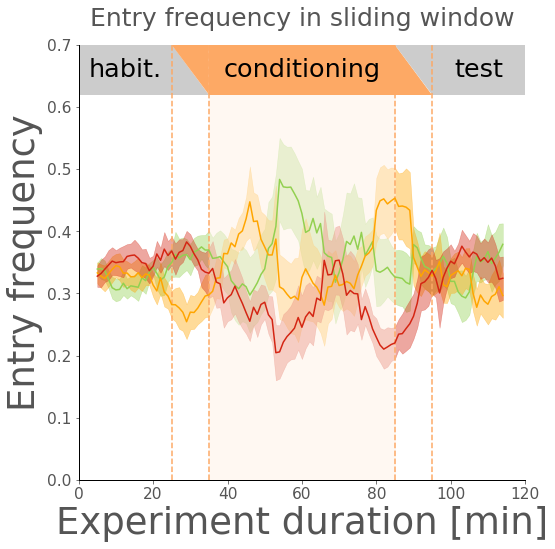

In [46]:
plotting.plot_sliding(ss_sub.loc[ss_sub.xp_id.isin(ft['One arm'])], 
                      analysis.entry, excl=True,# individ=True,
                      name='Entry frequency in sliding window',# show_val=[0],
                      **{'val': [0,1,2]})

10.0
6.13722222222


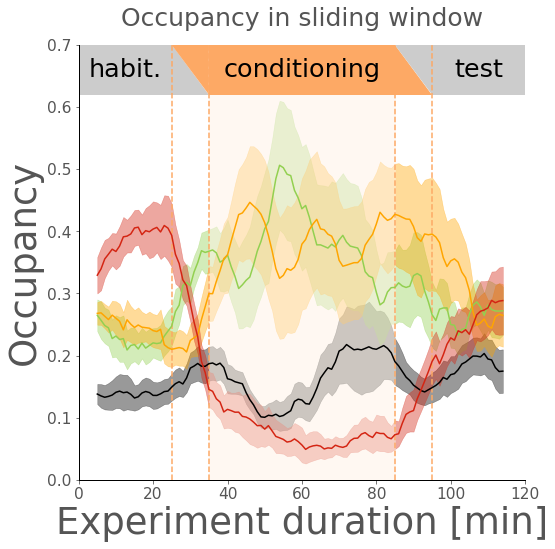

In [47]:
plotting.plot_sliding(ss_sub.loc[ss_sub.xp_id.isin(ft['One arm'])], 
                      analysis.occupancy, excl=True, #individ=True,
                      name='Occupancy in sliding window',# show_val=[0],
                      **{'val': [0,1,2, 3]})

___

7.0
6.13722222222


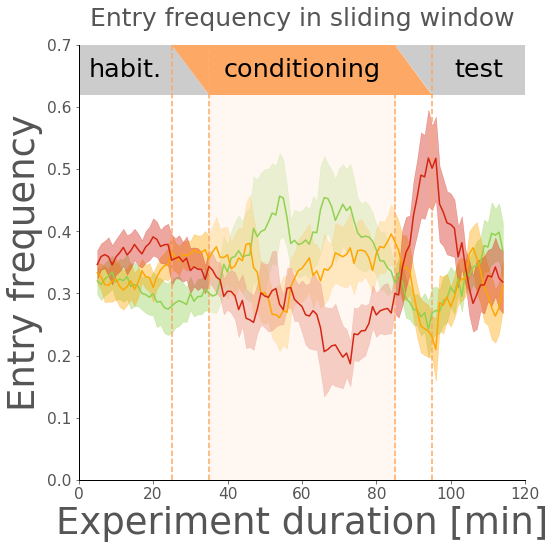

In [48]:
plotting.plot_sliding(ss_sub.loc[ss_sub.xp_id.isin(ft['Two arms'])], analysis.entry, excl=True,# individ=True,
                      name='Entry frequency in sliding window',# show_val=[0],
                      **{'val': [0,1,2]})

7.0
6.13722222222


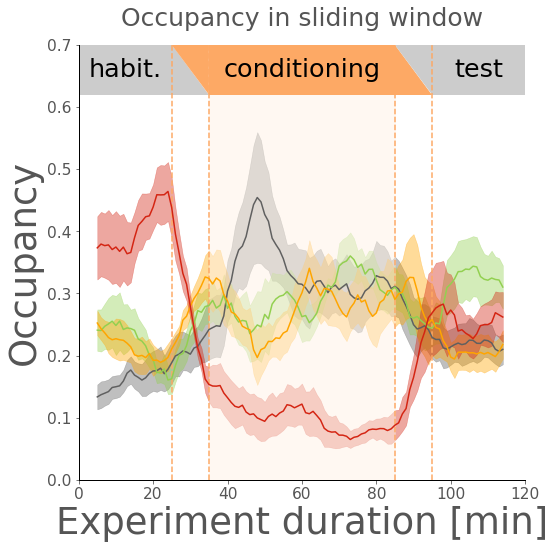

In [51]:
reload(plotting)
plotting.plot_sliding(ss_sub.loc[ss_sub.xp_id.isin(ft['Two arms'])], analysis.occupancy, excl=True, #individ=True,
                      name='Occupancy in sliding window',# show_val=[0],
                      **{'val': [0,1,2, 3]})

### Clustering
First we construct a matrix out of sliding windows for arm occupancy, including shocked arm and center. Thus we possibly can filter out 'unresponsive' fish and fish whose 'good' response is due to high center occupancy (which could be interesting in itself, but not for the purposes of this experiment).

In [ ]:
m = cl.ssa2matrix(ss_sub, [analysis.entry, analysis.occupancy], center=True, 
                  **{'full':True,'win_size':1200,'sliding_overlap':1140})
ssa_m = pd.DataFrame(m)
ssa_m[ssa_m.columns[1:]].T.plot()
plt.setp(plt.gca(), ylabel='Occupancy of shocked arm and \ncentral compartment (merged)')
plt.legend('')
plotting.set_plot_params(plt.gca())
plt.gca().set_xticks([])
plt.gca().set_ylim([0, 1])
plt.show()

In [ ]:
reload(cl)
y_pred = cl.cluster(ssa_m, cl.hi_alg, **{'n':2})

In [ ]:
# select only one cluster for further analysis
# a smaller cluster seems to include fish with very high center occupancy - let's get rid of it!
no_center = cl.good_bad(ss_sub, ssa_m, y_pred, 0)
no_center

In [ ]:
m = cl.ssa2matrix(no_center, [analysis.entry, analysis.occupancy],# center=True,
                  **{'full':True,'win_size':1200,'sliding_overlap':1140})
ssa_m = pd.DataFrame(m)
ssa_m[ssa_m.columns[1:]].T.plot()
plt.setp(plt.gca(), ylabel='Occupancy/entry of shocked arm')
plt.legend('')
plt.show()

In [ ]:
# hierarchical clustering seems to pick up a cluster with low occupancy and entry frequency
cl.cluster(ssa_m, cl.ac_alg, **{'n':2})